Populating the interactive namespace from numpy and matplotlib
Please enter a list of comma separated integers between 0 and 100.
Note that single numbers must be followed by a comma. 16,


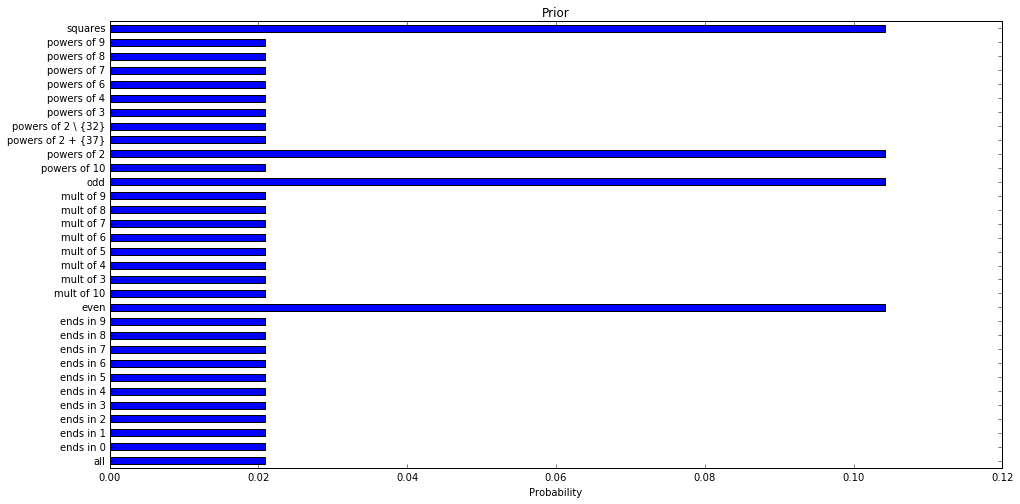

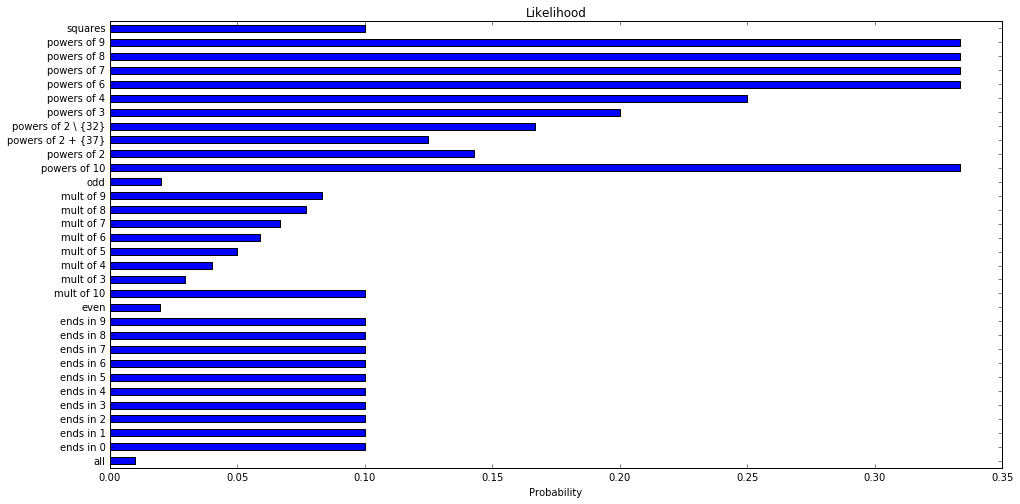

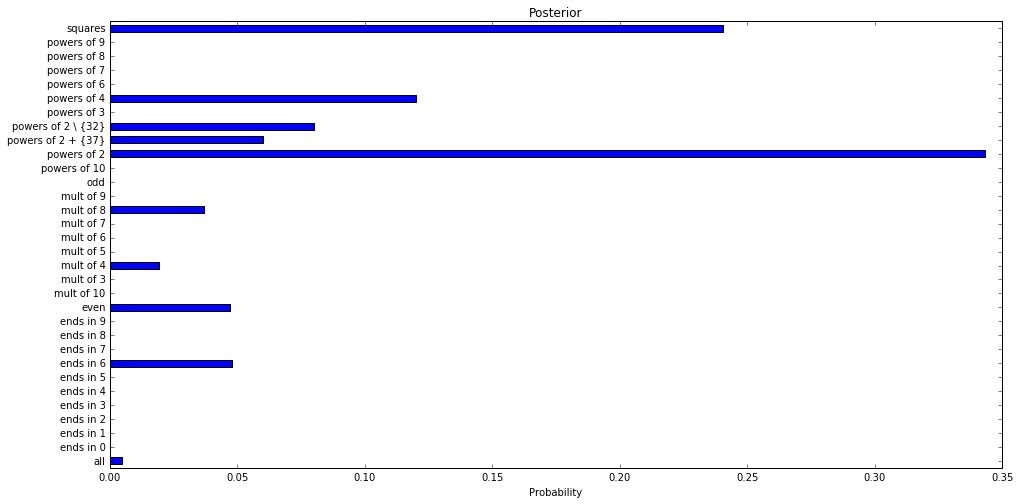

Most likely concept is powers of 2


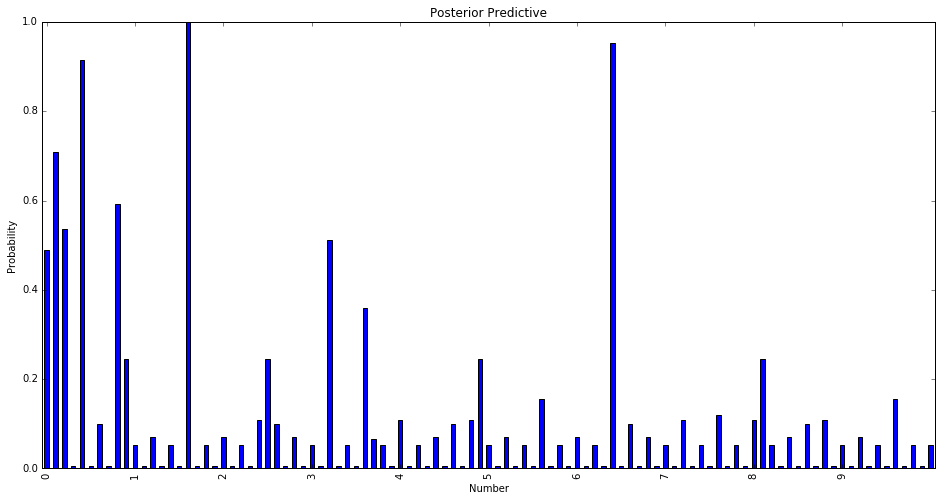

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Control the figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

# Helper function
def indicator(data,h):
    """
    Data is a sequence from the input built-in. h is an index
    representing a concept in concepts.
    
    Return 1 if data is contained in concept_members[h], 0 else."""
    
    if np.in1d(data,concept_members[h]).all():
        return 1
    else:
        return 0

# Set up concepts and concept members
concepts = ['even', 'odd', 'squares', 'mult of 3', 'mult of 4', 'mult of 5', 
            'mult of 6', 'mult of 7', 'mult of 8', 'mult of 9', 'mult of 10', 
            'ends in 0', 'ends in 1', 'ends in 2', 'ends in 3', 'ends in 4', 
            'ends in 5', 'ends in 6', 'ends in 7', 'ends in 8', 'ends in 9', 
            'powers of 2', 'powers of 3', 'powers of 4', 'powers of 6', 
            'powers of 7', 'powers of 8', 'powers of 9', 'powers of 10',
            'all', 'powers of 2 + {37}', 'powers of 2 \ {32}']

concept_members = [
    np.arange(0,101,2),
    np.arange(1,100,2),
    np.arange(10)**2,
    np.arange(0,100,3),
    np.arange(0,100,4),
    np.arange(0,100,5),
    np.arange(0,100,6),
    np.arange(0,100,7),
    np.arange(0,100,8),
    np.arange(0,100,9),
    np.arange(0,100,10),
    np.arange(0,100,10) + 0,
    np.arange(0,100,10) + 1, 
    np.arange(0,100,10) + 2, 
    np.arange(0,100,10) + 3, 
    np.arange(0,100,10) + 4, 
    np.arange(0,100,10) + 5, 
    np.arange(0,100,10) + 6, 
    np.arange(0,100,10) + 7, 
    np.arange(0,100,10) + 8,
    np.arange(0,100,10) + 9,
    2**(np.arange(7)),
    3**(np.arange(5)),
    4**(np.arange(4)),
    6**(np.arange(3)),
    7**(np.arange(3)),
    8**(np.arange(3)),
    9**(np.arange(3)),
    10**(np.arange(3)),
    np.arange(101),
    np.array([0,2,4,8,16,32,37,64]),
    np.array([0,2,4,8,16,64])
]


# Construction of prior
prior = np.ones((len(concepts),1)).reshape((32,))
prior[0:3] = 5
prior[21] = 5
prior = prior/np.sum(prior)


# Get input from user
string = "Please enter a list of comma separated integers between 0 and 100.\
\nNote that single numbers must be followed by a comma. "

data = input(string)
likelihood = 1.0/np.array([len(concept_members[i]) for i in xrange(32)])**len(data)


# Generate the posterior
posterior = np.zeros(32)
for h in xrange(32):
    posterior[h] = prior[h]*indicator(data,h)*likelihood[h]
posterior /= np.sum(posterior)


# Display prior, likelihood and posterior for each concept
ax = pd.Series(dict(zip(concepts,prior))).plot(kind='barh',title='Prior')
ax.set_xlabel('Probability')
plt.show()
ax = pd.Series(dict(zip(concepts,likelihood))).plot(kind='barh',title='Likelihood')
ax.set_xlabel('Probability')
plt.show()
ax = pd.Series(dict(zip(concepts,posterior))).plot(kind='barh',title='Posterior')
ax.set_xlabel('Probability')
plt.show()


# Print the most likely concept
print "Most likely concept is", concepts[np.argmax(posterior)]


# Print the posterior predictive distribution over numbers
post_dist = np.zeros(101)
for i in xrange(101):
    for h in xrange(32):
        post_dist[i] += indicator(i,h)*posterior[h]
        
ax = pd.Series(post_dist).plot(kind='bar',title="Posterior Predictive")
ax.set_xlabel('Number')
ax.set_ylabel('Probability')
ax.set_xticks(np.arange(0,100,10))
plt.show()